In [11]:
import pandas as pd
import os
import numpy as np

filenames = os.listdir('../Datasets/training/images')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')
        
    
df = pd.DataFrame({
    'filename': filenames
})

In [2]:
from keras.preprocessing.image import ImageDataGenerator
#We need to normalize image
datagen = ImageDataGenerator()

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size = 0.2)

In [4]:
train_df.head()


,filename
36,satImage_031.png
56,satImage_010.png
40,satImage_024.png
87,satImage_049.png
13,satImage_093.png


## Data augmentation

Image 99/100 is being processed2400 1920


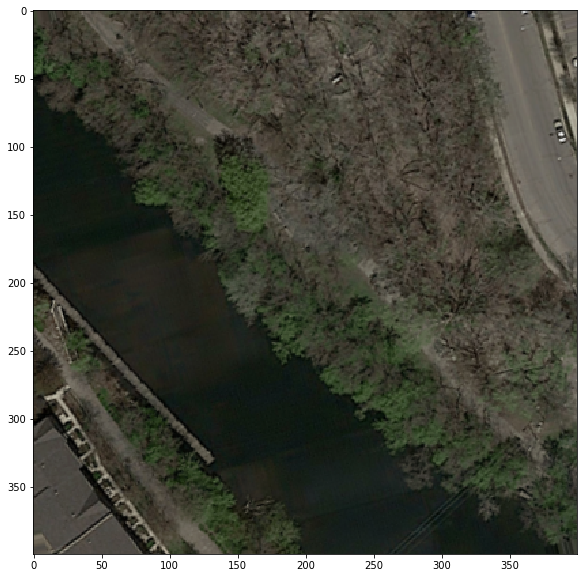

In [16]:
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys

#create 24 rotated images for one image
angls = np.arange(0, 360, 15)
zooms = np.array([1., 0.85, 0.8, 0.75, 0.8, 0.85,
                  1., 0.85, 0.8, 0.75, 0.8, 0.85,
                  1., 0.85, 0.8, 0.75, 0.8, 0.85,
                  1., 0.85, 0.8, 0.75, 0.8, 0.85])
imgs = []

for i, fileNb in enumerate(filenames):
    img=mpimg.imread('../Datasets/training/images/'+fileNb)
    imgr = img_to_array(img)
    for j, angle in enumerate(angls):
        zoom = zooms[j]
        img2 = datagen.apply_transform(x=imgr, transform_parameters={'theta':angle, 'zx':zoom, 'zy':zoom})
        imgs.append(img2)
        
    sys.stdout.write("\rImage {}/{} is being processed".format(i,len(filenames)))
    sys.stdout.flush()

    

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.imshow(img2)